# Surrogate time series

[paper](https://www.macalester.edu/~kaplan/knoxville/pd.pdf)

## 2. Detecting weak nonlinearity

Many quantities have been discussed in the literature that can be used to characterise nonlinear time series. For
the purpose of nonlinearity testing we need such quantities that are particularly powerful in discriminating linear
dynamics and weakly nonlinear signatures ? strong nonlinearity is usually more easily detectable. An important
objective criterion that can be used to guide the preferred choice is the discrimination power of the resulting test. It is defined as the probability that the null hypothesis is rejected when it is indeed false. It will obviously depend on how and how strongly the data actually deviates from the null hypothesis

비선형 시계열을 특성화하는데 사용될 수 있는 많은 양이 문헌에서 논의되어왔다. 비선형성 테스트를 위해선 선형 동역학과 약한 비선형 특성을 식별하는 데 특히 강력한 양이 필요하다. 강한 비선형 성은 대개 보다 쉽게 감지 할 수 있다. 선호하는 선택을 유도하는데 사용 할 수 있는 중요한 객관적인 기준은 결과 테스트의 차별 능력이다. 귀무 가설이 실제로 거짓일 때 귀무 가설이 거부 될 확률로 정의된다.
분명히 데이터가 귀무 가설에서 어떻게 그리고 얼마나 강하게 벗어 났는가에 달려있다.

### Higher order statistics

Traditional measures of nonlinearity are derived from generalisations of the two-point auto-covariance function or the power spectrum. The use of higher order cumulants as well as bi-and multi-spectra is discussed, e.g. in Ref. [10]. 

One particularly useful third order quantity is

비선형성의 전통적인 측정은 2 점 자기 공분산 함수 또는 파워 스펙트럼의 일반화로부터 유도된다. 2차 및 멀티 스펙트럼과 같은 고차 누적의 사용의 논의Ref10에서 논의된다.

특히 third order quatity 는 아래와 같다

$$\phi^{rev}(\tau) = \frac{1}{N-\tau}\sum_{n=\tau+1}^{N}(S_{n} - S_{n-\tau})^{3}$$

since it measures the asymmetry of a series under time reversal. (Remember that the statistics of linear stochastic
processes is always symmetric under time reversal. This can be most easily seen when the statistical properties are
given by the power spectrum which contains no information about the direction of time.) Time reversibility as a
criterion for discriminating time series is discussed in detail in Ref. [11], where, however, a different statistic is used to quantify it. 

The concept itself has quite a folklore and has been used, e.g. in Refs. [6,12]. Time irreversibility can be a strong signature of nonlinearity. Let us point out, however, that it does not imply a dynamical origin of the nonlinearity. We will later (Section 7.1) give an example of time asymmetry generated by a measurement function involving a nonlinear time average.

그것은 시간 역전 하에서 일련의 비대칭성을 측정하기 때문에(선형 확률 과정의 통계는 시간 역전에 대해 항상 대칭이다. 이것은 통계특성이 시간 방향에 대한 정보가 없는 힘 스펙트럼에 의해 주어질 때 가장 쉽게 볼 수 있다.) 차별을 위한 기준으로서의 시간 가역성이 논의될 수 있다. 자세한 내용은 ref [11]을 참고한다. 

이 개념 자체는 매우 전통적인 믿음으로 사용되어져왔다. Refs[6, 12]. Time irreversibility는 non-linearity의 신호다. 그러나 dynamical origin의 nonlinearity를 의미하지 않는다는 것을 주의해야한다. Section 7.1에서 논의할 것이다.(비선형 시간 평균을 포함하는 측정함수에 의해 생성 된 시간 비대칭의 예를 제시할 것이다.)

In [1]:
class TimeReversibility:
    def __init__(self, tau):
        self.tau = tau        
    
    def __call__(self, data): 
        length = len(data)
        coefficients = 1 / length - self.tau
        
        init_idx = self.tau + 1
        summation = 0
        
        # debugging variable
        final_idx = 0        
        for i in range(length - init_idx):
            diff_with_delay = data[init_idx + i] - data[init_idx - self.tau + i]
            third_orderized = pow(diff_with_delay, 3)
            summation += third_orderized
            
            # debugging operation
            final_idx = i + init_idx
        
        assert final_idx+1 == length
        
        return coefficients * summation

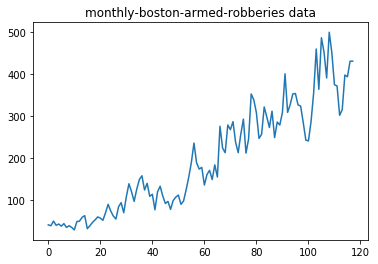

Time Reversibility Score: -52031987.60169492


In [2]:
%matplotlib inline
import csv
import copy
import matplotlib.pyplot as plt

montly_armed_robberies = list()

with open("monthly-boston-armed-robberies-j.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:                        
            if len(row) > 1:
                montly_armed_robberies.append(int(row[1]))
            line_count += 1

time_reversibility = TimeReversibility(tau=3)
tr_score = time_reversibility(montly_armed_robberies)
         
plt.figure()
plt.plot(montly_armed_robberies)
plt.title("monthly-boston-armed-robberies data")
plt.show()

print("Time Reversibility Score: {}".format(tr_score))


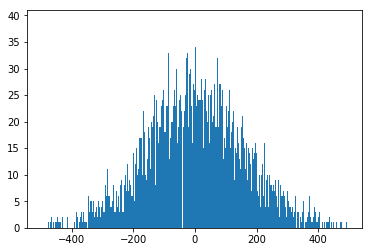

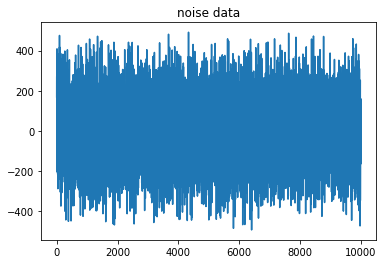

Time Reversibility Score: -4890692106.4955


In [20]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

scale = 160.
_range = 500
size = 10000

noise = truncnorm(a=-_range/scale, b=_range/scale, scale=scale).rvs(size=size)
noise = noise.round().astype(int)
bins = 2 * _range + 1
plt.hist(noise, bins=bins)
noise = noise.tolist()

time_reversibility = TimeReversibility(tau=3)
tr_score = time_reversibility(noise)

plt.figure()
plt.plot(noise)
plt.title("noise data")
plt.show()


print("Time Reversibility Score: {}".format(tr_score))

keys : dict_keys(['__header__', '__version__', '__globals__', 'cyl_ch1', 'cyl_ch2', 'hook_ch1', 'hook_ch2', 'tip_ch1', 'tip_ch2', 'palm_ch1', 'palm_ch2', 'spher_ch1', 'spher_ch2', 'lat_ch1', 'lat_ch2'])
(30, 3000)


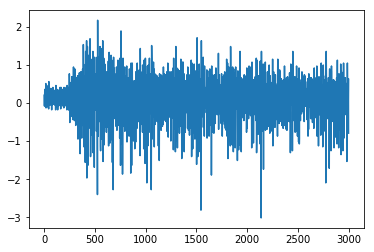

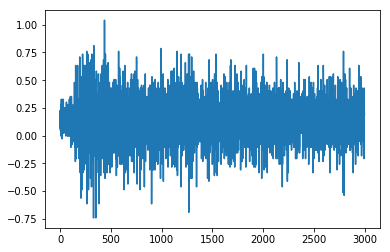

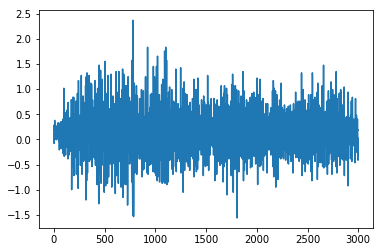

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

emg = scipy.io.loadmat("male_1.mat")
print("keys : {}".format(emg.keys()))
spher_emg = emg["spher_ch2"]
cyrindar_emg = emg["cyl_ch1"]
hook_emg = emg["hook_ch1"]

print(cyrindar_emg.shape)

plt.figure()
plt.plot(spher_emg[0])
plt.show()

plt.figure()
plt.plot(cyrindar_emg[0])
plt.show()

plt.figure()
plt.plot(hook_emg[0])
plt.show()


length of EMG data : 1761
[ 0.42836264  1.37982412 -0.10618276 ...  0.72496121  0.76658765
 -0.93235762]


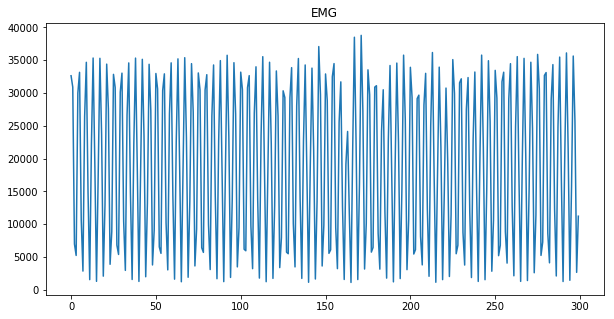

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

emg = scipy.io.loadmat("male_1.mat")

foream_emg = list()
with open("EMG_2.txt", 'r') as file:
    count = 0
    while(True):        
        count += 1        
        line = file.readline()
        
        if count < 3:
            continue
            
        if line:
            
            if line.split(" ")[2].split(":")[0] == "ch2":                
                foream_emg.append(float(line.split(" ")[2].split(":")[-1])) 
        else:
            break

print("length of EMG data : {}".format(len(foream_emg)))

foream_emg = np.array(foream_emg)
norm_data = (foream_emg - np.mean(foream_emg)) / np.std(foream_emg)
print(norm_data)

plt.figure(figsize=(10, 5))
plt.plot(foream_emg[1000:1300])
plt.title("EMG")
plt.show()
